# **Answer 2**

**Descriptive Analytics**

Analyze whether the new payment page performs better than the old one to increase the conversion



----

Import required libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

%matplotlib inline

# Load and Describe Data

## Load Data

Import and read dataset

In [3]:
data = pd.read_excel('/content/drive/MyDrive/Data Sources.xlsx')
data.head()


,user_id,timestamp,payment_page,is_convert
0,922696,2017-01-02 13:42:05.379,new_page,0
1,781507,2017-01-02 13:42:15.234,old_page,0
2,737319,2017-01-02 13:42:21.786,old_page,0
3,818377,2017-01-02 13:42:26.641,new_page,0
4,725857,2017-01-02 13:42:27.851,new_page,0


we need to know how many rows dan columns in this dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       294478 non-null  int64         
 1   timestamp     294478 non-null  datetime64[ns]
 2   payment_page  294478 non-null  object        
 3   is_convert    294478 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 9.0+ MB


# Exploratory Data Analysis (EDA)

## Describe Data

Split the numerical and categorical data 

In [5]:
data_num = data.select_dtypes(include=['int64', 'float64'])
data_cat = data['payment_page']

In [6]:
data_num.describe()

,user_id,is_convert
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [7]:
data_cat.describe()

count       294478
unique           2
top       old_page
freq        147239
Name: payment_page, dtype: object

Check whether there is missing value and duplicated data or not.

## Missing Values

In [8]:
data.isnull().sum()

user_id         0
timestamp       0
payment_page    0
is_convert      0
dtype: int64

There is no missing value in this dataset

## Duplicated Data

In [9]:
if data.duplicated().sum() == 0:
    print('There is no duplicated data')
else:
    print('There are duplicated data: ', data.duplicated().sum())

There is no duplicated data


we need to find the unique user, so if there are duplicated userId then we need to drop them.

In [24]:
unique_user = data['user_id'].value_counts(ascending=False)
multi_users = unique_user[unique_user > 1].count()

print('There are {} users that appear multiple times in the dataset'.format(multi_users))

There are 3894 users that appear multiple times in the dataset


In [25]:
multi_users_drop = unique_user[unique_user > 1].index

data = data[~data['user_id'].isin(multi_users_drop)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286690 entries, 0 to 294477
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       286690 non-null  int64         
 1   timestamp     286690 non-null  datetime64[ns]
 2   payment_page  286690 non-null  object        
 3   is_convert    286690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 10.9+ MB


we have new dataset with unique user only, there are 286690 rows.

## Univariate Analysis

### Numerical Data

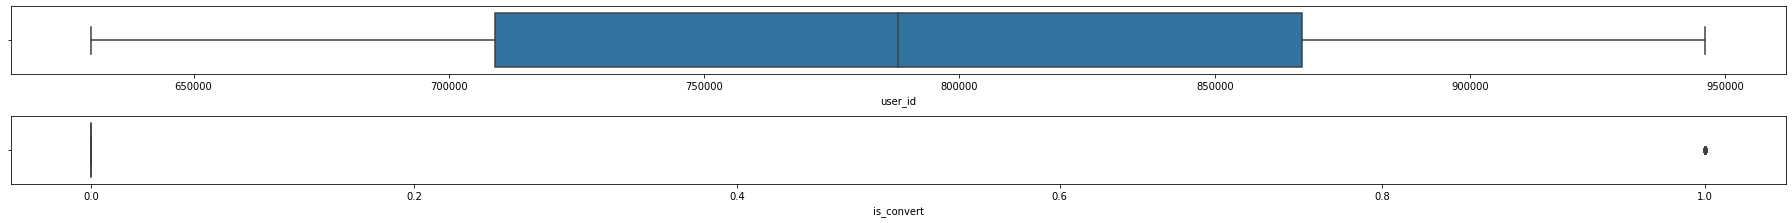

In [26]:
plt.figure(figsize=(25, 15))
for i in range(0, len(data_num.columns)):
    plt.subplot(10, 1, i+1)
    sns.boxplot(data[data_num.columns[i]],orient='v')
    plt.tight_layout()


### Categorical Data

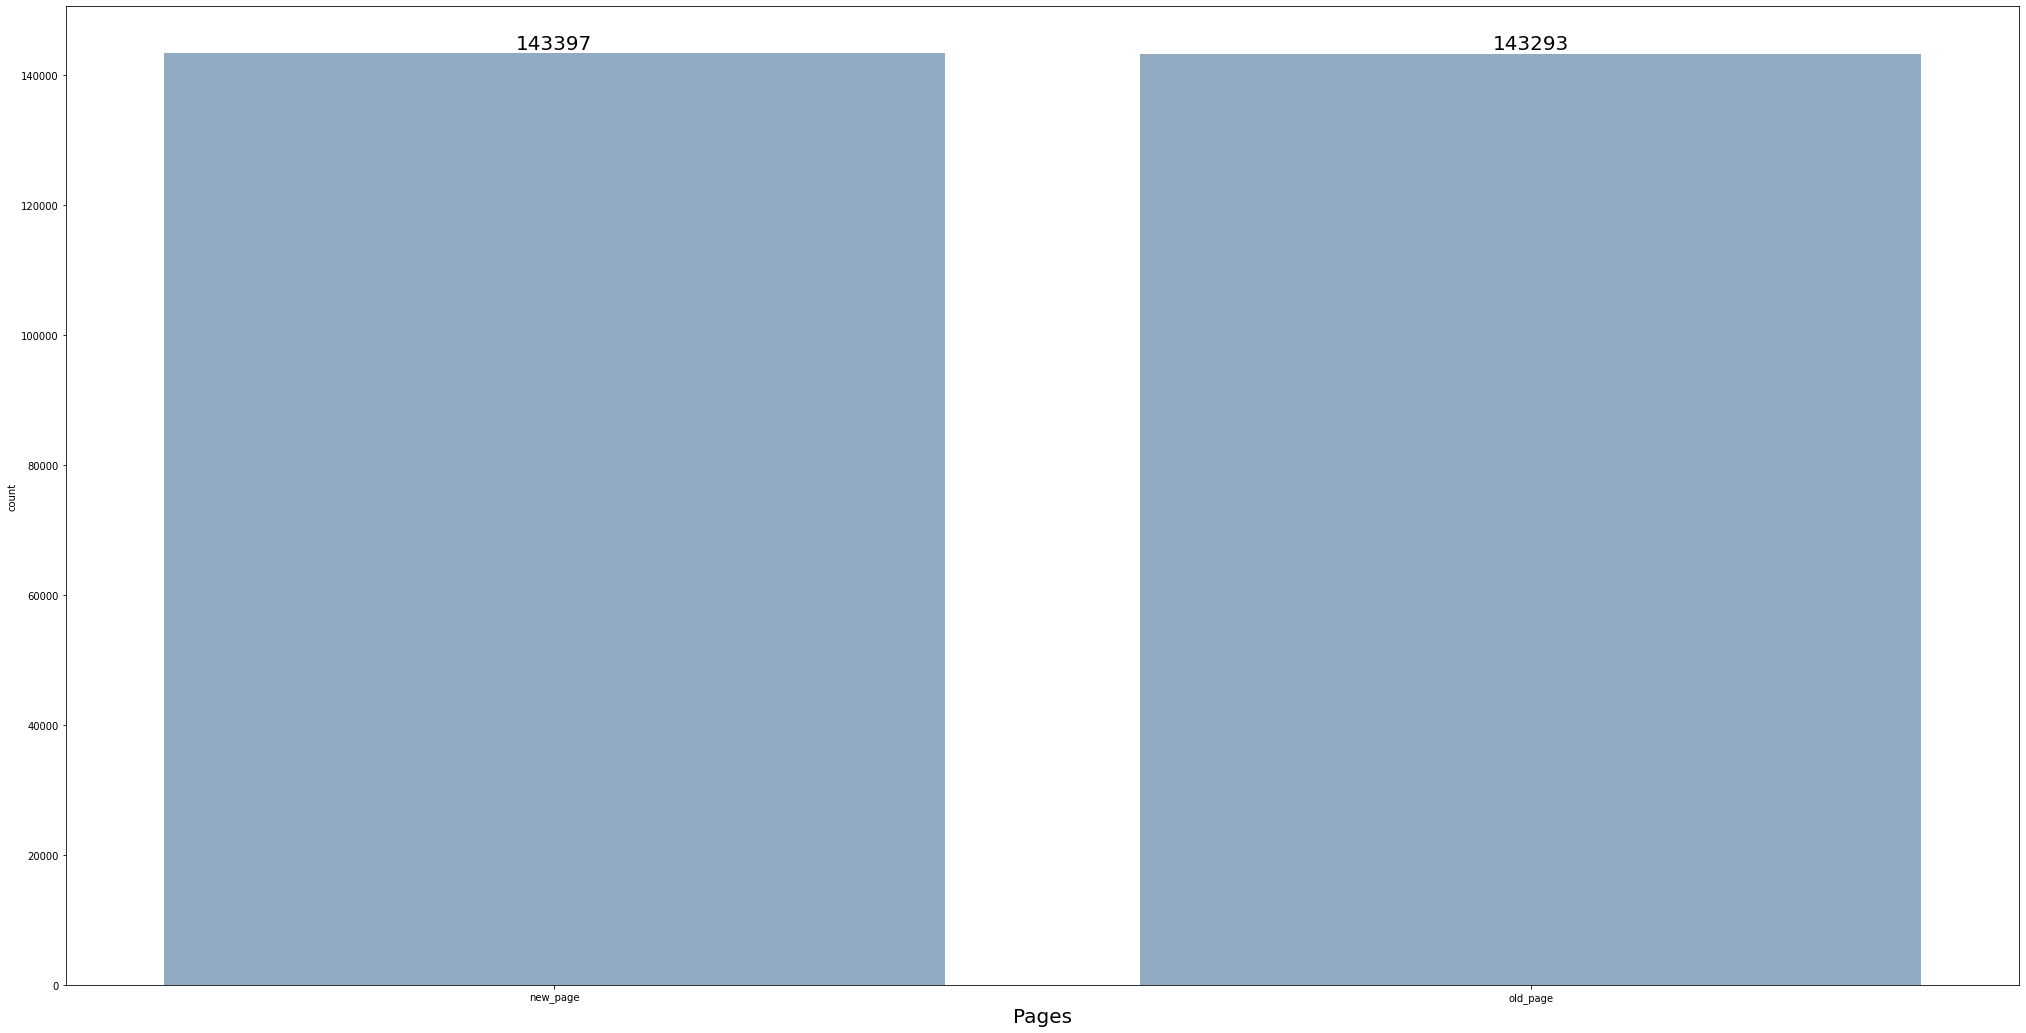

In [27]:
plt.figure(figsize = (35, 18))
graph = sns.countplot(x = 'payment_page', color='#8aabca', data=data)
graph.set_xlabel('Pages', fontsize=20)


for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=20)

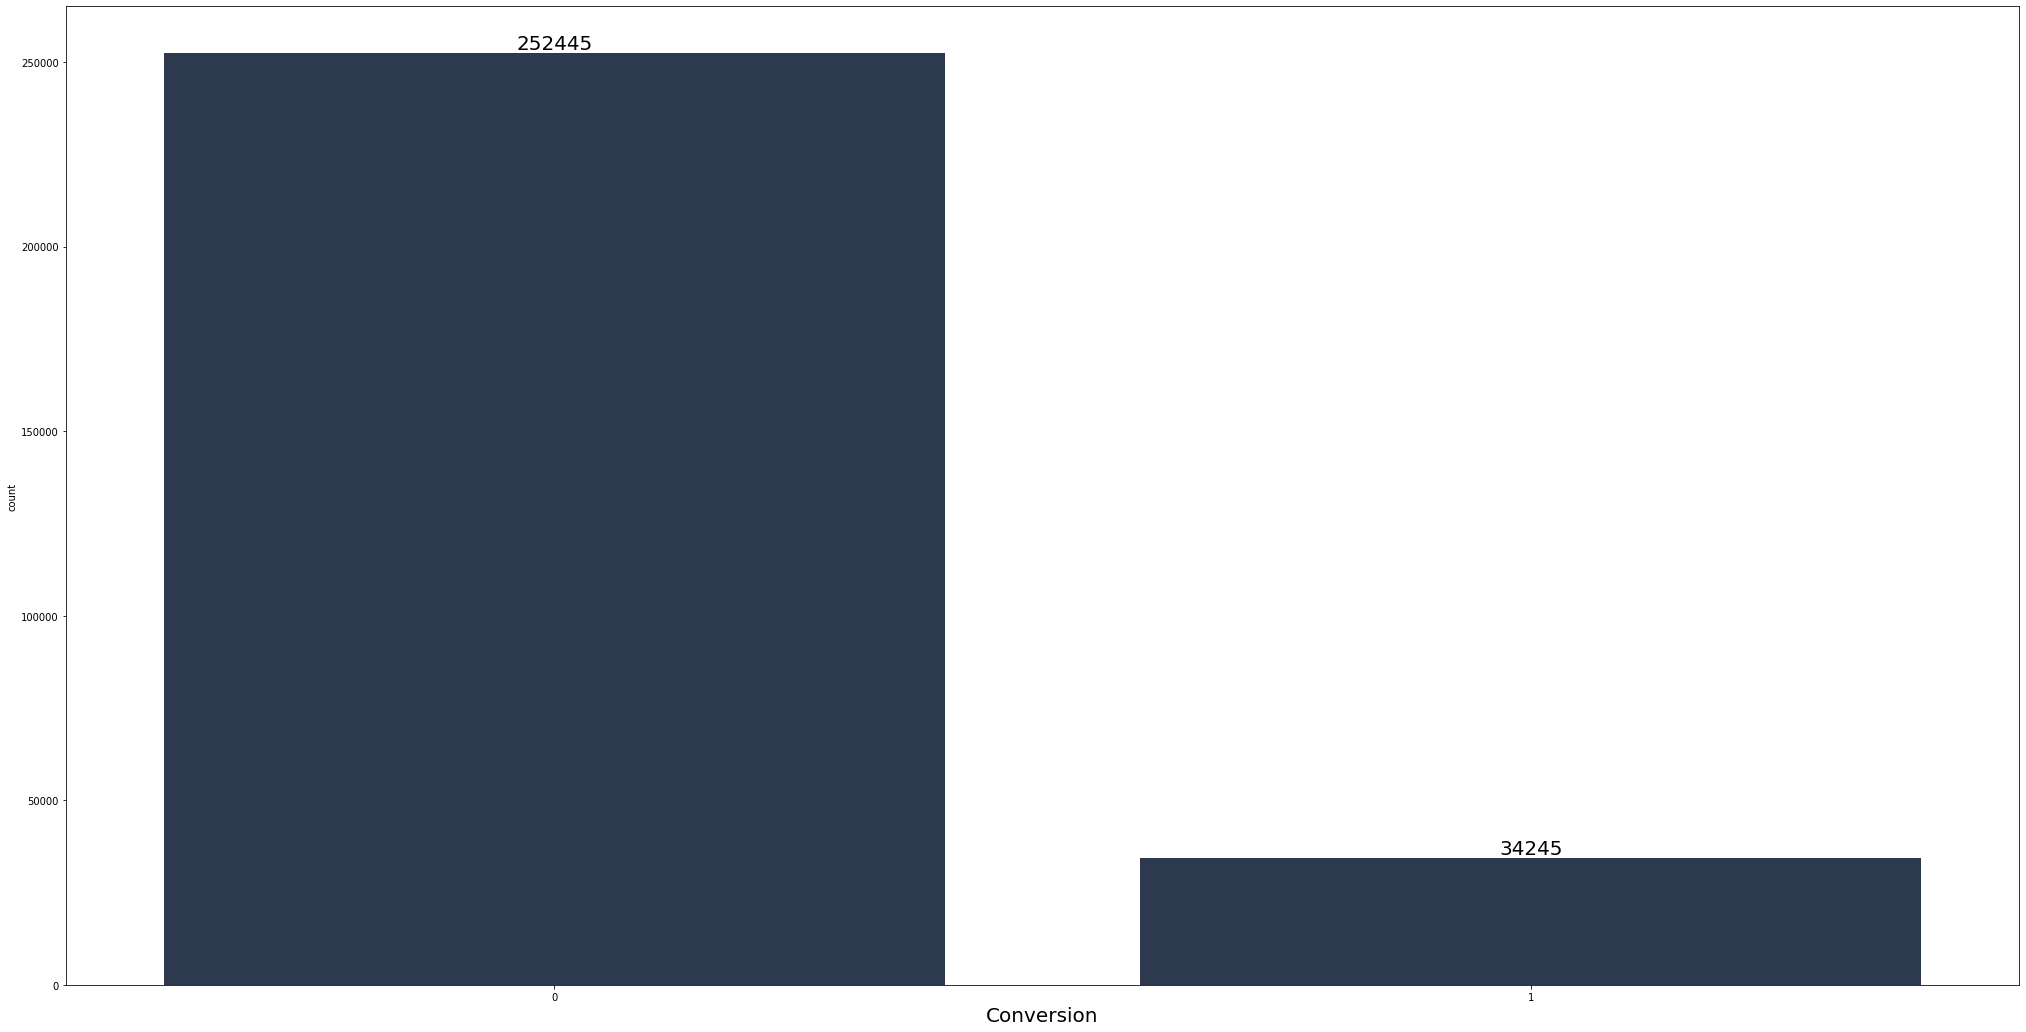

In [28]:
plt.figure(figsize = (35, 18))
graph = sns.countplot(x = 'is_convert', color='#273755', data=data)
graph.set_xlabel('Conversion', fontsize=20)


for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=20)

In this chart, there is only **12% users** who converted in both old page and new page.

## Multivariate Analysis

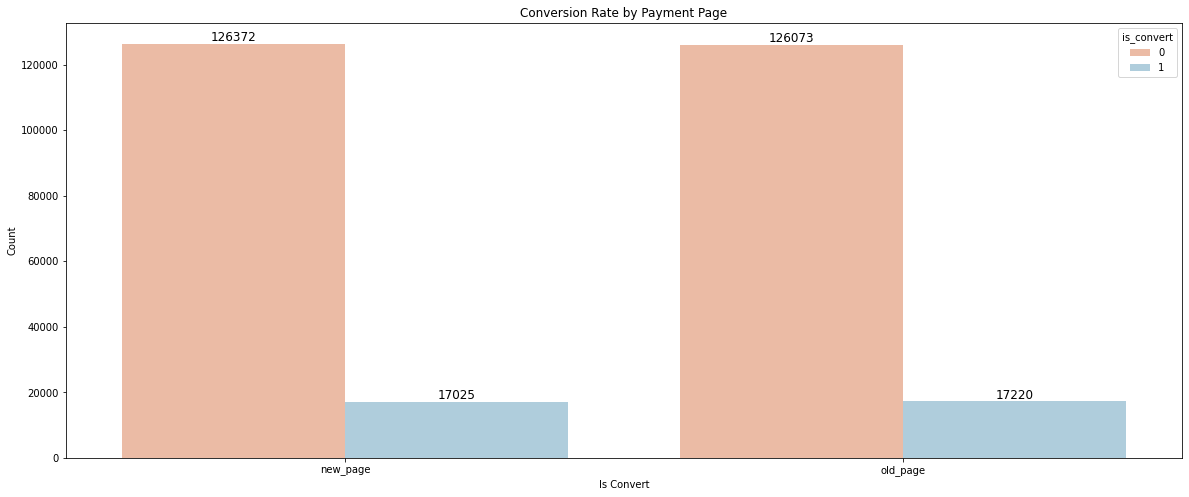

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,8))
g = sns.countplot('payment_page',hue='is_convert',data=data,ax=ax, palette='RdBu')
ax.set_title('Conversion Rate by Payment Page')

ax.set_xlabel('Is Convert')
ax.set_ylabel('Count')

for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=12)

We compared the conversion rate from new_page and old page, the result is conversion rate in old page is slightly **higher 0.13%** than new page. In the new page, user who converted is only **11.87%**

---

another insight for user who converted

In [30]:
convert = data[data['is_convert']==1]
convert.head(3)

,user_id,timestamp,payment_page,is_convert
10,643921,2017-01-02 13:43:03.767,old_page,1
14,889153,2017-01-02 13:43:35.690,new_page,1
26,664064,2017-01-02 13:45:13.057,old_page,1


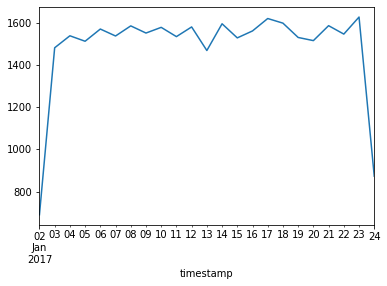

In [31]:
converted_in_day = convert.resample('D', on='timestamp').user_id.count()
converted_in_day

In [32]:
converted_in_day.mean()

1488.9130434782608

There are average 1488 users who converted in a day.

Then, we need to look specifically insight in new_page. First, we filter the dataset based on `new_page` and `is_convert=1`

In [33]:
convert_new = convert[convert['payment_page']=='new_page']
convert_new.head(3)

,user_id,timestamp,payment_page,is_convert
14,889153,2017-01-02 13:43:35.690,new_page,1
31,871586,2017-01-02 13:45:41.340,new_page,1
32,735893,2017-01-02 13:45:52.805,new_page,1


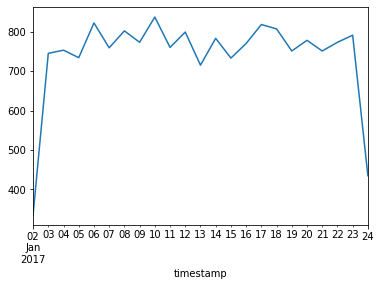

In [34]:
convert_new_in_day = convert_new.resample('D', on='timestamp').user_id.count()
convert_new_in_day.plot()

In [35]:
convert_new_in_day.mean()

740.2173913043479

There are average 740 users who converted in new page in a day.

----

from the chart above, we can conclude that conversion rate in old page is higher than new page. We can actually prove that using *hypothesis testing*

1. Sampling Data

with 2% of error, we are going to sampling the data

In [38]:
N = data.shape[0]
e = 2/100

slovin = N/(1+N * e**2)
print('Number of samples:', round(slovin))

Number of samples: 2478


Slice data from dataset. We will sample 2478 for each group contains user who accessed each payment page

In [41]:
old_page_sample = data[data['payment_page'] == 'old_page'].sample(n=round(slovin), random_state=42)
new_page_sample = data[data['payment_page'] == 'new_page'].sample(n=round(slovin), random_state=42)

sample_data = old_page_sample.append(new_page_sample)
sample_data.reset_index(drop=True, inplace=True)
sample_data.head()

,user_id,timestamp,payment_page,is_convert
0,823727,2017-01-24 11:47:46.281,old_page,0
1,644191,2017-01-22 00:54:16.546,old_page,0
2,887898,2017-01-24 02:19:20.125,old_page,0
3,634543,2017-01-19 22:19:21.293,old_page,0
4,922103,2017-01-16 05:39:06.687,old_page,0


In [42]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4956 entries, 0 to 4955
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       4956 non-null   int64         
 1   timestamp     4956 non-null   datetime64[ns]
 2   payment_page  4956 non-null   object        
 3   is_convert    4956 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 155.0+ KB


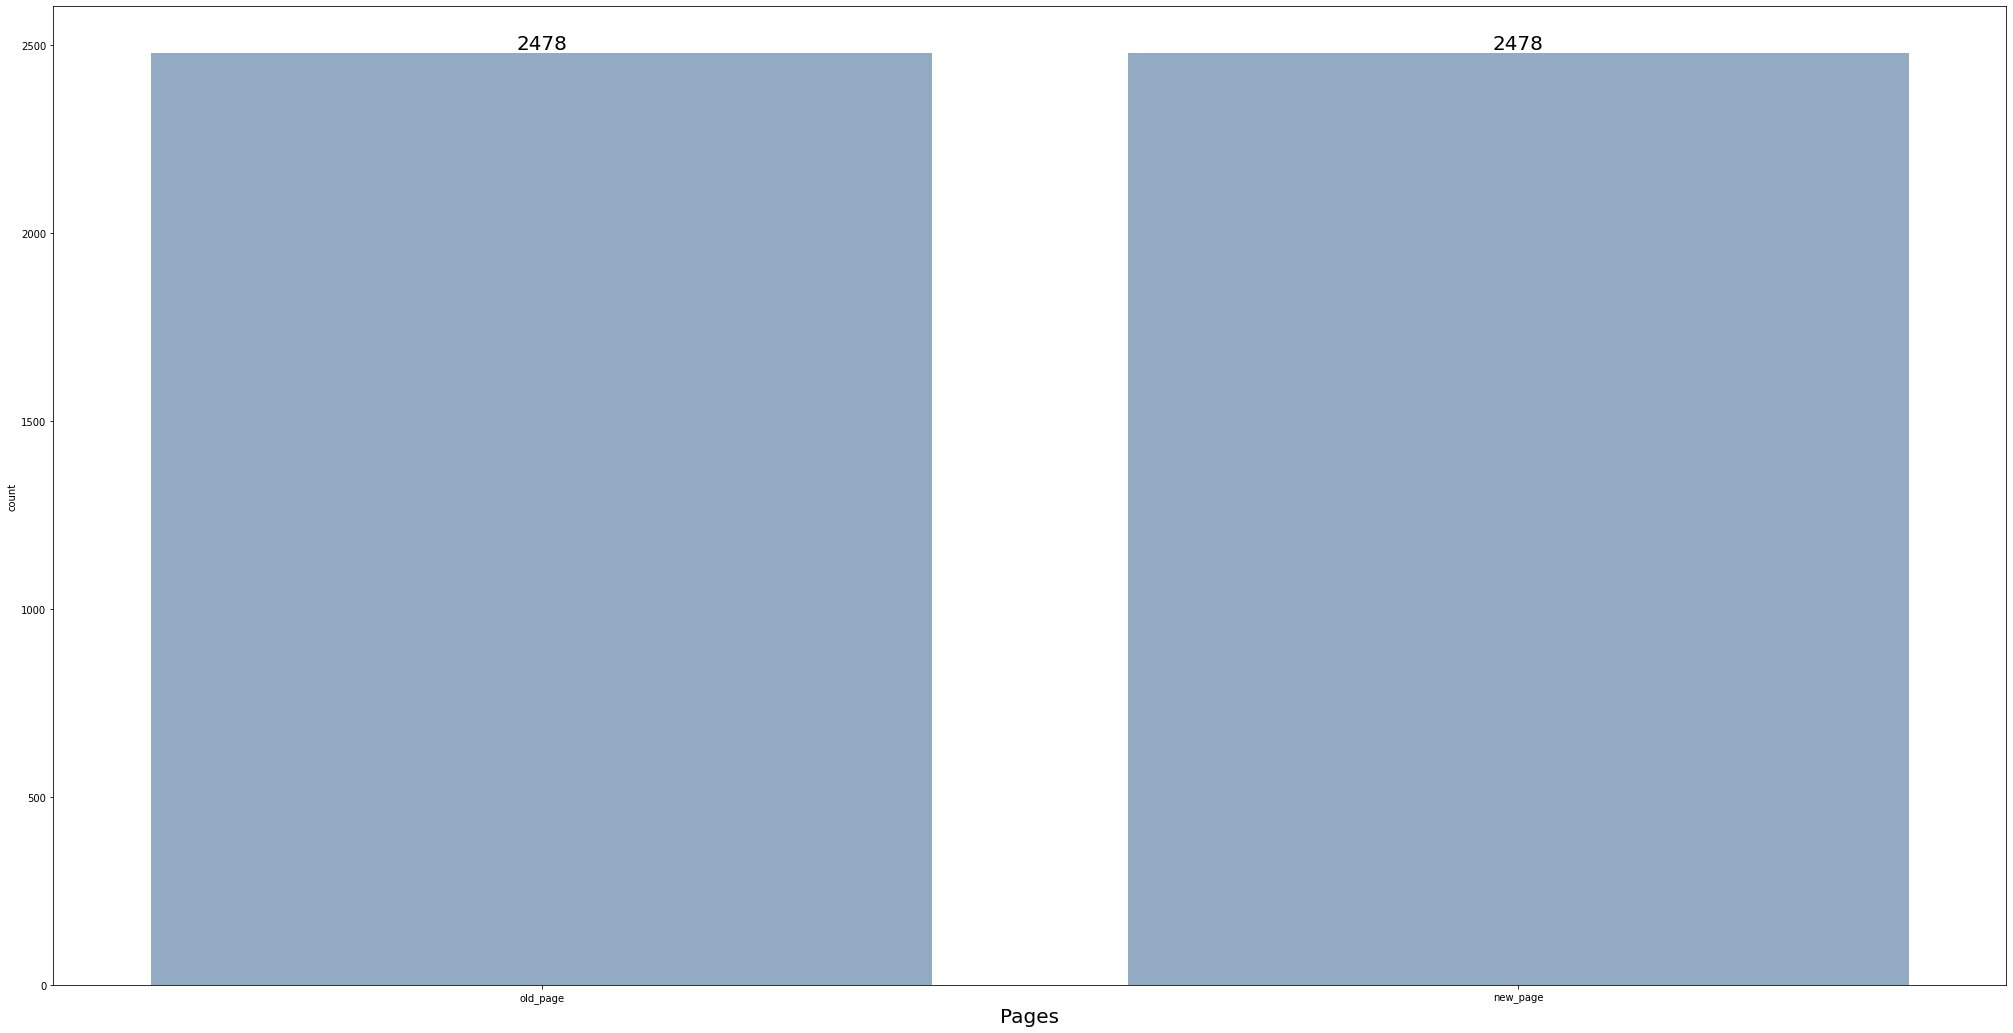

In [43]:
plt.figure(figsize = (35, 18))
graph = sns.countplot(x = 'payment_page', color='#8aabca', data=sample_data)
graph.set_xlabel('Pages', fontsize=20)


for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=20)

In [47]:
conversion_rate = sample_data.groupby('payment_page')['is_convert']

std_p = lambda x: np.std(x, ddof=0)              
se_p = lambda x: st.sem(x, ddof=0)       

conversion_rate = conversion_rate.agg([np.mean, std_p, se_p])
conversion_rate.columns = ['conversion_rate', 'standard_deviation', 'standard_error']


conversion_rate.style.format('{:.3f}')

,conversion_rate,standard_deviation,standard_error
payment_page,,,
new_page,0.113,0.317,0.006
old_page,0.114,0.318,0.006


from the calculation above, old_page also have the conversion rate slightly higher than the new one.

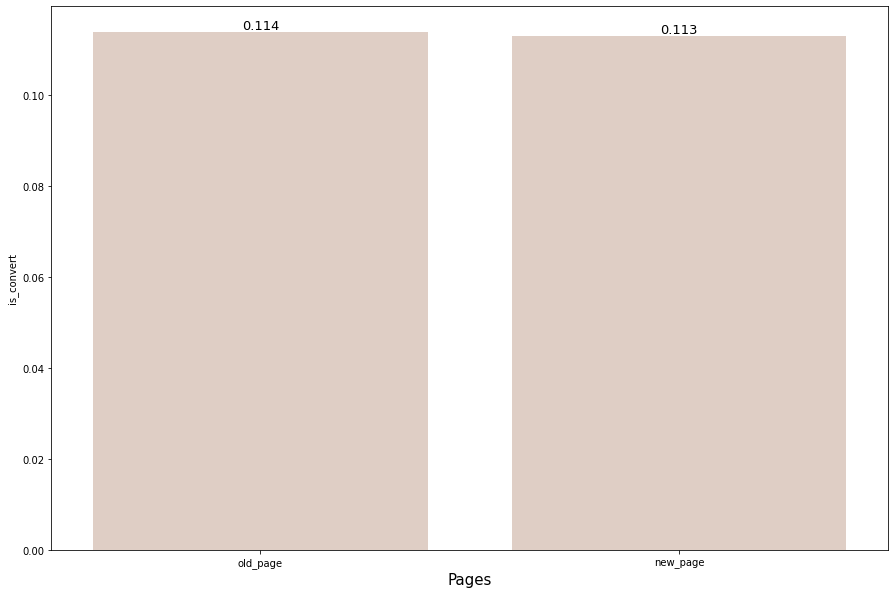

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [52]:
plt.figure(figsize = (15, 10))
graph = sns.barplot(x = 'payment_page', y='is_convert', color='#e3cdc1', data=sample_data, ci=False)
graph.set_xlabel('Pages', fontsize=15)


for p in graph.patches:
        graph.annotate('{:.3f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black', fontsize=13)
        
        plt.figure(figsize=(8,6))



---

We can actually prove that is it statistically significant the difference of conversion rate between old page and new page?

we are going to use T-Test to prove that.



**H0**: Conversion rate in new page as same as in the old page

**H1**: Conversion rate in new page is difference from old page

In [57]:
new_page = sample_data[sample_data['payment_page']=='new_page']
new_page = sample_data['is_convert']

old_page = sample_data[sample_data['payment_page']=='old_page']
old_page = sample_data['is_convert']

old_page, new_page

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 4951    0
 4952    0
 4953    0
 4954    1
 4955    0
 Name: is_convert, Length: 4956, dtype: int64, 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 4951    0
 4952    0
 4953    0
 4954    1
 4955    0
 Name: is_convert, Length: 4956, dtype: int64)

In [62]:
ttest = st.ttest_ind(a=old_page, b=new_page)
p_value = ttest.pvalue
alpha = 5/100

print('P-Value :', p_value)
if p_value >= alpha:
    print('(Accept H0) Conversion rate in new page as same as in the new page')
else:
    print('(Reject H0) Conversion rate in new page is difference from old page')

P-Value : 1.0
(Accept H0) Conversion rate in new page as same as in the new page


Since our P-value is **1.0** and it is above our alpha α=0.05 threshold, we accept hypothesis H0. Means that we are **95%** confidence the new design did not perform significantly different than the old one.

---